In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [4]:
data = datasets.load_diabetes()
print(diabetes_X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [5]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [28]:
for i in range(len(data.feature_names)):
    print(data.feature_names[i])
    print(data.data[i])


age
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
sex
[-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06832974 -0.09220405]
bmi
[ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
 -0.03235593 -0.00259226  0.00286377 -0.02593034]
bp
[-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
 -0.03603757  0.03430886  0.02269202 -0.00936191]
s1
[ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
  0.00814208 -0.00259226 -0.03199144 -0.04664087]
s2
[-0.09269548 -0.04464164 -0.04069594 -0.01944209 -0.06899065 -0.07928784
  0.04127682 -0.0763945  -0.04118039 -0.09634616]
s3
[-0.04547248  0.05068012 -0.04716281 -0.01599922 -0.04009564 -0.02480001
  0.00077881 -0.03949338 -0.06291295 -0.03835666]
s4
[ 0.06350368  0.05068012 -0.00189471  0.06662967  0.09061988  0.10891438
  0.02286863  0.01770335 -0.03581673  0

In [17]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [29]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Taken from: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py

In [7]:
diabetes = datasets.load_diabetes()

X = diabetes.data
y = diabetes.target

feature_names = diabetes.feature_names
print(feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


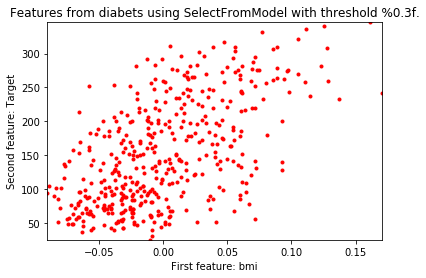

In [16]:
plt.title(
    "Features from diabets using SelectFromModel with "
    "threshold %0.3f.")
feature1 = X[:, 2]
feature2 = data.target
plt.plot(feature1, feature2, 'r.')
plt.xlabel("First feature: {}".format(feature_names[2]))
plt.ylabel("Second feature: {}".format("Target"))
plt.xlim([np.min(feature1), np.max(feature1)])
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [31]:
clf = LassoCV().fit(X, y)
importance = np.abs(clf.coef_)
print(importance)

[  0.         226.2375274  526.85738059 314.44026013 196.92164002
   1.48742026 151.78054083 106.52846989 530.58541123  64.50588257]


In [32]:
idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.01

idx_features = (-importance).argsort()[:2]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

sfm = SelectFromModel(clf, threshold=threshold)
sfm.fit(X, y)
X_transform = sfm.transform(X)

n_features = sfm.transform(X).shape[1]

Selected features: ['s5' 'bmi']


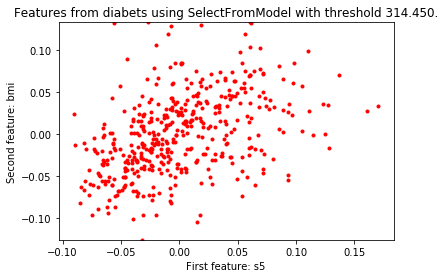

In [33]:
plt.title(
    "Features from diabets using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("First feature: {}".format(name_features[0]))
plt.ylabel("Second feature: {}".format(name_features[1]))
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

age
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


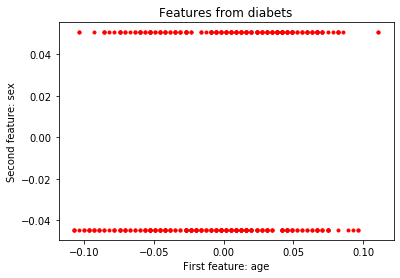

sex
[-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06832974 -0.09220405]


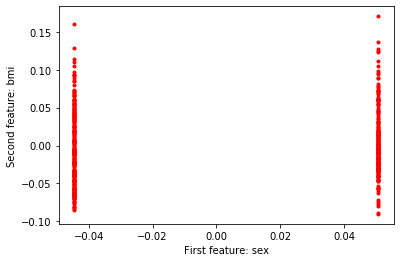

bmi
[ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
 -0.03235593 -0.00259226  0.00286377 -0.02593034]


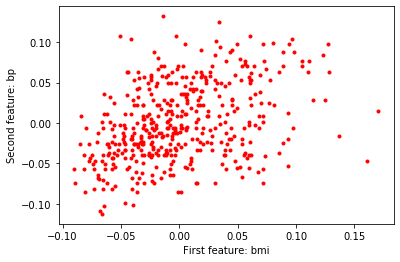

bp
[-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
 -0.03603757  0.03430886  0.02269202 -0.00936191]


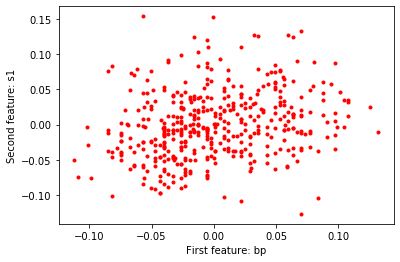

s1
[ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
  0.00814208 -0.00259226 -0.03199144 -0.04664087]


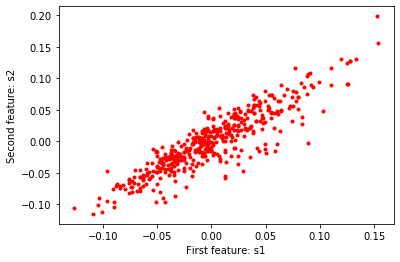

s2
[-0.09269548 -0.04464164 -0.04069594 -0.01944209 -0.06899065 -0.07928784
  0.04127682 -0.0763945  -0.04118039 -0.09634616]


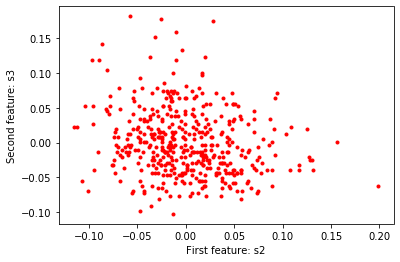

s3
[-0.04547248  0.05068012 -0.04716281 -0.01599922 -0.04009564 -0.02480001
  0.00077881 -0.03949338 -0.06291295 -0.03835666]


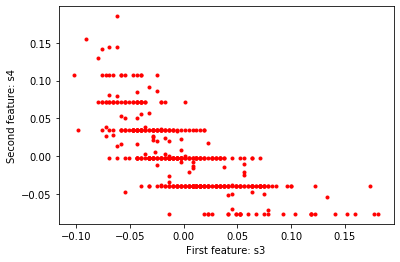

s4
[ 0.06350368  0.05068012 -0.00189471  0.06662967  0.09061988  0.10891438
  0.02286863  0.01770335 -0.03581673  0.00306441]


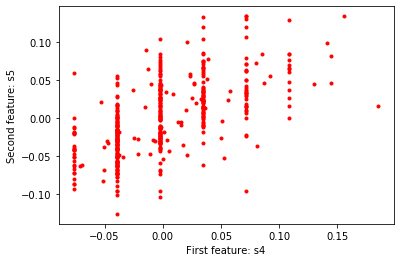

s5
[ 0.04170844  0.05068012  0.06169621 -0.04009932 -0.01395254  0.00620169
 -0.02867429 -0.00259226 -0.01495648  0.01134862]


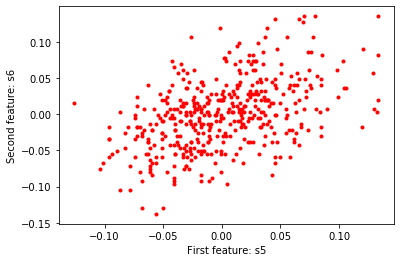

s6
[-0.07090025 -0.04464164  0.03906215 -0.03321358 -0.01257658 -0.03450761
 -0.02499266 -0.00259226  0.06773633 -0.01350402]


IndexError: index 10 is out of bounds for axis 1 with size 10

In [56]:
plt.title("Features from diabets")
for i in range(len(data.feature_names)):
    print(data.feature_names[i])
    print(data.data[i])
    plt.plot(data.data[:, i], data.data[:, i+1], 'r.')
    plt.xlabel("First feature: {}".format(data.feature_names[i]))
    plt.ylabel("Second feature: {}".format(data.feature_names[i+1]))
    #plt.ylim([data.data[i], np.max(feature2)])
    plt.show()

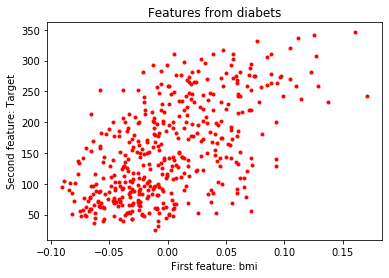

In [55]:
plt.title("Features from diabets")

plt.plot(data.data[:, 2], data.target, 'r.')
plt.xlabel("First feature: {}".format(data.feature_names[2]))
plt.ylabel("Second feature: Target")

#plt.ylim([data.data[i], np.max(feature2)])
plt.show()

In [57]:
data.data[:, 2].shape

(442,)

In [50]:
data.shape

AttributeError: shape

In [17]:
boston = datasets.load_boston()
X = boston.data
y = boston.target


feature_names = boston.feature_names
print(feature_names)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


CRIM
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]


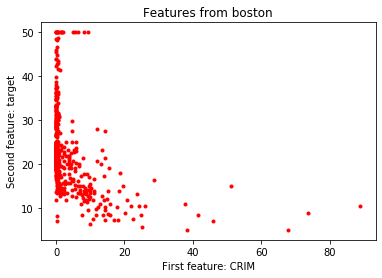

ZN
[2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
 7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
 9.1400e+00]


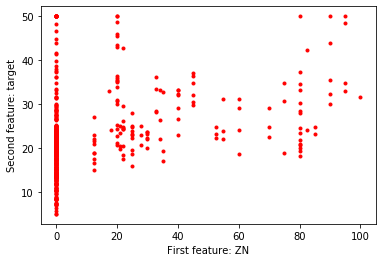

INDUS
[2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
 6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
 4.0300e+00]


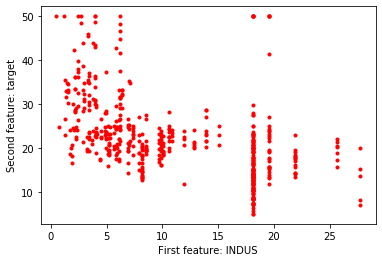

CHAS
[3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
 4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
 2.9400e+00]


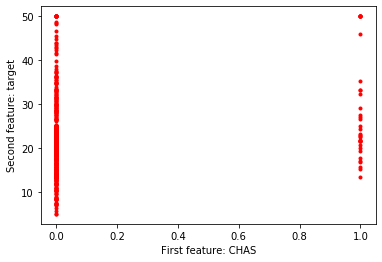

NOX
[6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
 5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
 5.3300e+00]


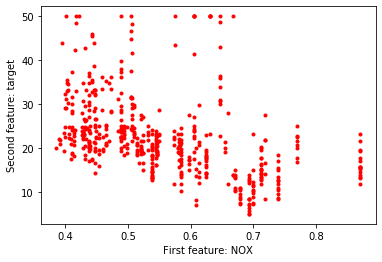

RM
[2.9850e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.4300e+00
 5.8700e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9412e+02
 5.2100e+00]


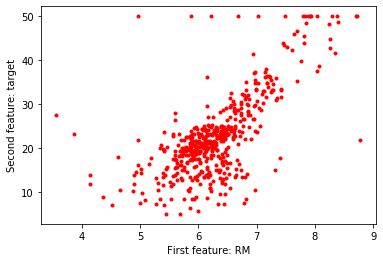

AGE
[8.8290e-02 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 6.0120e+00
 6.6600e+01 5.5605e+00 5.0000e+00 3.1100e+02 1.5200e+01 3.9560e+02
 1.2430e+01]


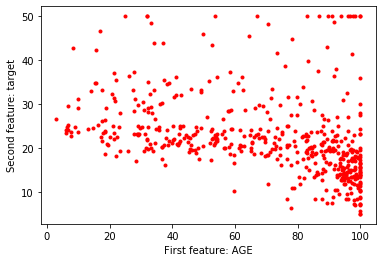

DIS
[1.4455e-01 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 6.1720e+00
 9.6100e+01 5.9505e+00 5.0000e+00 3.1100e+02 1.5200e+01 3.9690e+02
 1.9150e+01]


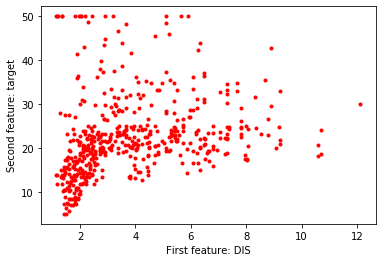

RAD
[2.1124e-01 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 5.6310e+00
 1.0000e+02 6.0821e+00 5.0000e+00 3.1100e+02 1.5200e+01 3.8663e+02
 2.9930e+01]


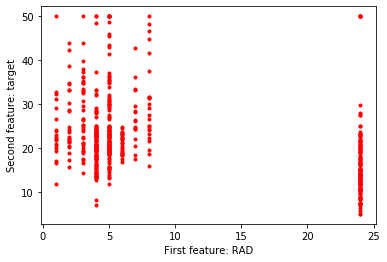

TAX
[1.7004e-01 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 6.0040e+00
 8.5900e+01 6.5921e+00 5.0000e+00 3.1100e+02 1.5200e+01 3.8671e+02
 1.7100e+01]


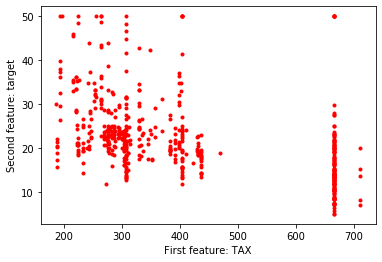

PTRATIO
[2.2489e-01 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 6.3770e+00
 9.4300e+01 6.3467e+00 5.0000e+00 3.1100e+02 1.5200e+01 3.9252e+02
 2.0450e+01]


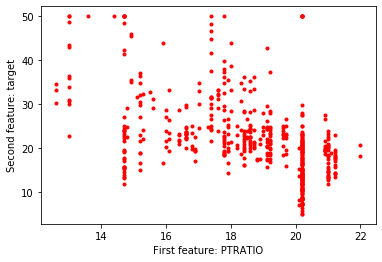

B
[1.1747e-01 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 6.0090e+00
 8.2900e+01 6.2267e+00 5.0000e+00 3.1100e+02 1.5200e+01 3.9690e+02
 1.3270e+01]


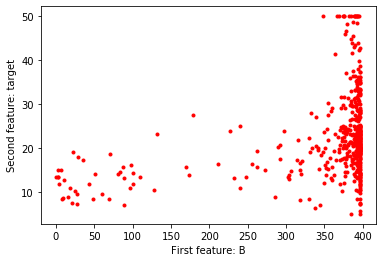

LSTAT
[9.3780e-02 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 5.8890e+00
 3.9000e+01 5.4509e+00 5.0000e+00 3.1100e+02 1.5200e+01 3.9050e+02
 1.5710e+01]


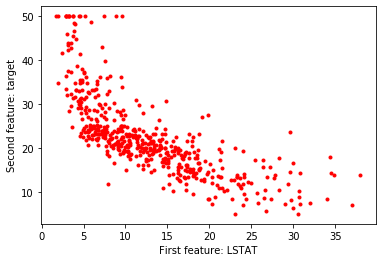

In [7]:
plt.title("Features from boston")
for i in range(len(boston.feature_names)):
    print(boston.feature_names[i])
    print(boston.data[i])
    plt.plot(boston.data[:, i], boston.target, 'r.')
    plt.xlabel("First feature: {}".format(boston.feature_names[i]))
    plt.ylabel("Second feature: {}".format("target"))
    #plt.ylim([data.data[i], np.max(feature2)])
    plt.show()

In [18]:
print("X min:", np.amin(boston.data[:, 5]), "Max", np.amax(boston.data[:, 5]))
#max(feature2)])
print("y min:", np.amin(boston.target), "Max", np.amax(boston.target))

X min: 3.561 Max 8.78
y min: 5.0 Max 50.0


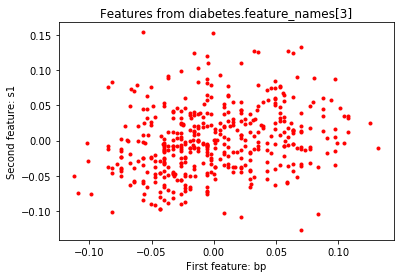

In [20]:
plt.title("Features from diabetes")

plt.plot(diabetes.data[:, 3], diabetes.data[:, 4], 'r.')
plt.xlabel("First feature: {}".format(diabetes.feature_names[3]))
plt.ylabel("Second feature: {}".format(diabetes.feature_names[4]))
#plt.ylim([data.data[i], np.max(feature2)])
plt.show()

In [4]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

In [5]:
iris = datasets.load_iris()
k = 3
X = iris.data
y = iris.target

In [6]:
def plot_clusters(X, y=None):
        plt.scatter(X[:, 0], X[:, 1], c=y)
        plt.show()

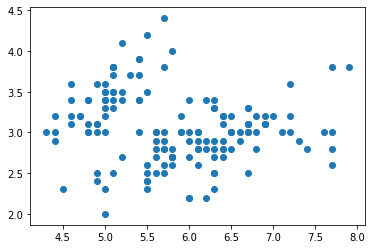

In [7]:
plot_clusters(X)

In [7]:
X.shape

(150, 4)

In [8]:
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [9]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                                show_xlabels=True, show_ylabels=True):
        print("Plot dis boundaries!")
        mins = X.min(axis=0) - 0.1
        maxs = X.max(axis=0) + 0.1
        xx, yy, zz, aa = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                            np.linspace(mins[1], maxs[1], resolution),
                            np.linspace(mins[2], maxs[2], resolution),
                            np.linspace(mins[3], maxs[3], resolution))
        Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel(), aa.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                    cmap="Pastel2")
        plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                    linewidths=1, colors='k')
        plot_clusters(X)
        if show_centroids:
            plot_centroids(clusterer.cluster_centers_)
        
        plt.show()

In [10]:
plot_decision_boundaries(kmeans, X)

Plot dis boundaries!


In [14]:
def plot_clusters_labels(X, y=None):
        plt.scatter(X[:, 0], X[:, 1], c=y_pred)
        plot_centroids(kmeans.cluster_centers_)
        plt.show()

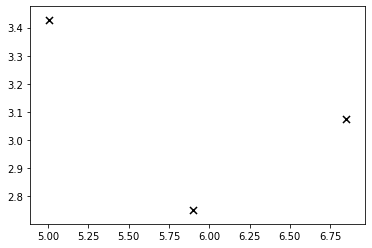

In [13]:
plot_centroids(kmeans.cluster_centers_)

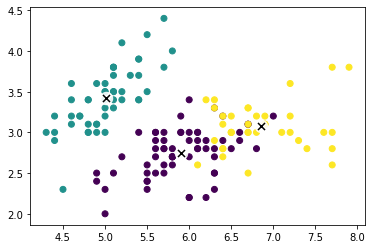

In [15]:
plot_clusters_labels(X)

In [70]:
print(kmeans.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [12]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
        if weights is not None:
            centroids = centroids[weights > weights.max() / 10]
        
        plt.scatter(centroids[:, 0], centroids[:, 1],
                                marker='o', s=30, linewidths=8,
                                color=circle_color, zorder=10, alpha=0.9)
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=50, linewidths=50,
                    color=cross_color, zorder=11, alpha=1)